<img src="images/spotify_logo.png">

# Prediction of the popularity on Spotify Music 

## Challenge Datacamp

This repository has been made by 6 students of the IP Paris schools **Margaux Boscary**, **Paul Fayard**, **Tom Reppelin**, **Vladimir Kondratyev**, **Guillaume Peltier**, and **Jean Pachebat,**.

It was created as an assignement for the Data Camp 2022.


## Introduction

Spotify is a platform for streaming all kinds of music.
Today we know that we consume a lot of music. Spotify makes it easy for us to access music in real time and with no limits.
There are certain music or artists that we love to listen to, but what makes them so popular?

***Through this notebook we will try to predict by what factor a music becomes trendy.***

Our dataset is composed of trendy music from the past decades, their authors and lots of features to discover !

### Description of the Data

- `uri` : The Spotify URI for the album.
- `name` : The name of the track.
- `danceability` : Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- `energy`  : Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

- `loudness` : The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

- `speechiness`: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

- `acousticness` : A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

- `instrumentalness` : Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

- `liveness` : Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

- `valence` : A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

- `tempo` : The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

- `duration_ms` : The duration of the track in milliseconds.

- `popularity`
- `explicit`

- `album_name` : The name of the album.
- `artist_name_i` : The name of the i-th artist.
- `artist_uri_i` : the Spotify URI for the i-th artist
- `release_album_date` : date of the album release.

## I - Loading the data

## Guillaume : 
 - parler de l'api Spotify
 - parler de la librarie spotipy
 - ne pas forcément montrer tout le code
 - Ajouter le fait de télécharger la base depuis google colab
 - expliquer comment refaire la base de données (avec les id spotify)

<img src="images/jup_spot.png" width="600" height="1000">

#### Requirements to run the notebook
[Installation instruction right here](https://github.com/MargauxB74/DATACAMP_SPOTIFY)

### MANDATORY IMPORT

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime

### PROVISOIRE

[Documentation](https://spotipy.readthedocs.io/en/2.19.0/)


[Spotify API](https://developer.spotify.com/documentation/web-api/reference/#/)

In [2]:
pip install spotipy --upgrade

Note: you may need to restart the kernel to use updated packages.


In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import pandas as pd
import utils_api as api

from tqdm import tqdm

In [4]:
client_id = "908dd70b4a2b4bdd87e502cc22012572"
client_secret = "7d8d1ec41d414694aa30fc606ce74a43"

auth_manager = SpotifyClientCredentials(
    client_id=client_id, client_secret=client_secret
)
sp = spotipy.Spotify(auth_manager=auth_manager)

In [5]:
list_playlist_id = ["69fEt9DN5r4JQATi52sRtq",
                    "5S8SJdl1BDc0ugpkEvFsIL",
                    "6yPiKpy7evrwvZodByKvM9",
                    "4rnleEAOdmFAbRcNCgZMpY",
                    "6iaALa2quWaw2Wg4SvlS5y",
                    "6FKDzNYZ8IW1pvYVF4zUN2",
                    "6WMgB51Ys7GWuBwDpXS2pK",
                    "1G8IpkZKobrIlXcVPoSIuf"]

df_music = api.get_df_from_playlist(list_playlist_id)

Getting playlists...


  0%|          | 0/479 [00:00<?, ?it/s]

Getting audio features...


100%|██████████| 479/479 [02:14<00:00,  3.57it/s]


In [6]:
uri_artists = [col for col in df_music if col.startswith('artist_uri')]

all_artists = df_music[uri_artists].values.flatten()
# remove duplicate
list_artists = list(set(filter(lambda x: x != "nan", all_artists.astype("str"))))

artists_data = api.get_artists(list_artists)

100%|██████████| 431/431 [01:11<00:00,  6.03it/s]


In [7]:
# max number of genres for each artists
max_nb_genres = max([len(artist["genres"]) for artist in artists_data])

artists_meta = api.parse_artists(artists_data, max_nb_genres)

columns_name_artists = ["artist_uri", "artist_popularity"] + [
    f"genre_artist_{i}" for i in range(max_nb_genres)
]

df_artist = pd.DataFrame(artists_meta, columns=columns_name_artists)

In [8]:
df_artist.to_csv('df_artist.csv')
df_music.to_csv('df_music.csv')
df = pd.read_csv('./demo_spotify_30k.csv', sep = '|')

### PROVISOIRE

## II - Exploratory data analysis

### A) Data Vizualisation


In [9]:
df_artist

,artist_uri,artist_popularity,genre_artist_0,genre_artist_1,genre_artist_2,genre_artist_3,genre_artist_4,genre_artist_5,genre_artist_6,genre_artist_7,genre_artist_8,genre_artist_9,genre_artist_10,genre_artist_11,genre_artist_12,genre_artist_13,genre_artist_14,genre_artist_15,genre_artist_16,genre_artist_17
0,spotify:artist:5QKYeEDsNp6ScBnkGdfrx9,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,spotify:artist:1eLGUQKWRwsvTDCJhH788m,34,jazz trio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,spotify:artist:1kMPdZQVdUhMDKDWOJM5iK,59,australian hip hop,escape room,pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,spotify:artist:6ySxYu68zTsO5ghsThpGtS,58,edm,german techno,german trance,pop dance,progressive house,progressive trance,trance,uplifting trance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,spotify:artist:1f5GqyOPo0CkotzzRwviBu,63,comedy rap,comic,pop rap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21532,spotify:artist:6xDRBrApnv0HI3o6nNl1X3,33,vapor pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21533,spotify:artist:3shBNuvo8XyNthoiWNaCYc,52,pop rap brasileiro,trap funk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21534,spotify:artist:4EMtGVFvfCSrEmWaGV0roE,57,alternative hip hop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21535,spotify:artist:5QdyldG4Fl4TPiOIeMNpBZ,69,art pop,brooklyn indie,indie folk,indie pop,indie rock,small room,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_artist.columns

Index(['artist_uri', 'artist_popularity', 'genre_artist_0', 'genre_artist_1',
       'genre_artist_2', 'genre_artist_3', 'genre_artist_4', 'genre_artist_5',
       'genre_artist_6', 'genre_artist_7', 'genre_artist_8', 'genre_artist_9',
       'genre_artist_10', 'genre_artist_11', 'genre_artist_12',
       'genre_artist_13', 'genre_artist_14', 'genre_artist_15',
       'genre_artist_16', 'genre_artist_17'],
      dtype='object')

In [11]:
df_music

,uri,name,duration_ms,popularity,explicit,nb_artist,artist_name_1,artist_uri_1,artist_name_2,artist_uri_2,...,album_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,spotify:track:7wmm8ycV3DwStuQK0LGkdH,Nemeton for solo Percussion,740413,13,False,2,Matthias Pintscher,spotify:artist:69vvuLr29oiG02SjKP7fdO,Rainer Römer,spotify:artist:3L7fQ04gd9c8Yc5GSrzqzZ,...,2010,0.390,0.06920,-23.312,0.0905,0.435000,0.504000,0.0822,0.0433,76.465
1,spotify:track:4cFb48uJoAaR0ZogBcUTM5,Pure,259042,40,False,1,Marc Van Mourik,spotify:artist:7s9gWdUK3IXsvkQP58Es4H,NaN,NaN,...,2013-12-04,0.283,0.00966,-28.107,0.0327,0.993000,0.807000,0.0884,0.1080,103.468
2,spotify:track:62bPGqh8IYBpVOzxIxkrXA,青春時計,208466,36,False,1,NGT48,spotify:artist:4wZjP2p0Sm5EHM32uuAgGf,NaN,NaN,...,2017-04-11,0.694,0.76100,-4.087,0.0372,0.446000,0.000000,0.2890,0.5500,114.947
3,spotify:track:47144TkGls0yeVLzXliEa3,Teens//candle,222029,42,True,1,Guitar Fight from Fooly Cooly,spotify:artist:6mJuP6zvtXUAVL9xjxZiDL,NaN,NaN,...,2020-08-14,0.206,0.88700,-4.186,0.1680,0.000228,0.001240,0.2910,0.2320,95.081
4,spotify:track:3MTLncsF4tzTICc05bM034,Seven Nation Army,147586,27,False,1,Super Power Club,spotify:artist:5vGR79cM4EqZxXgvcExy7f,NaN,NaN,...,2009-09-08,0.646,0.27900,-3.575,0.0545,0.149000,0.915000,0.0993,0.7150,120.063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47809,spotify:track:2QSD3K3b3BJ8DPhGhQfDPW,Into The Valley,199466,50,False,1,Skids,spotify:artist:2vwI9jlKSgJbne3dlTzaLO,NaN,NaN,...,1979-01-01,0.332,0.70700,-12.698,0.0361,0.000012,0.006120,0.1100,0.6520,144.815
47810,spotify:track:49XnDVsYOHgV4gFZeCojKj,Tonight's Da Night,201800,0,True,1,Redman,spotify:artist:7xTKLpo7UCzXSnlH7fOIoM,NaN,NaN,...,1992-01-01,0.464,0.74900,-8.564,0.4800,0.224000,0.000046,0.3510,0.8790,181.121
47811,spotify:track:5Y9IIH8Xmo1nuk0gfFjc4Q,Figure 8,183040,0,False,1,FKA twigs,spotify:artist:6nB0iY1cjSY1KyhYyuIIKH,NaN,NaN,...,2015-08-13,0.694,0.71000,-9.793,0.3400,0.527000,0.001350,0.0697,0.4150,119.964
47812,spotify:track:0ya0JYEFoXNviB8RMeHDtW,Like An Angel,222160,0,False,1,The Mighty Lemon Drops,spotify:artist:3LrsctPHK5wMdvEqvFN8BW,NaN,NaN,...,1997,0.332,0.80000,-9.746,0.0326,0.000368,0.001600,0.0850,0.8320,149.240


In [12]:
df_music.columns

Index(['uri', 'name', 'duration_ms', 'popularity', 'explicit', 'nb_artist',
       'artist_name_1', 'artist_uri_1', 'artist_name_2', 'artist_uri_2',
       'artist_name_3', 'artist_uri_3', 'artist_name_4', 'artist_uri_4',
       'artist_name_5', 'artist_uri_5', 'artist_name_6', 'artist_uri_6',
       'artist_name_7', 'artist_uri_7', 'artist_name_8', 'artist_uri_8',
       'artist_name_9', 'artist_uri_9', 'artist_name_10', 'artist_uri_10',
       'artist_name_11', 'artist_uri_11', 'artist_name_12', 'artist_uri_12',
       'artist_name_13', 'artist_uri_13', 'artist_name_14', 'artist_uri_14',
       'artist_name_15', 'artist_uri_15', 'artist_name_16', 'artist_uri_16',
       'artist_name_17', 'artist_uri_17', 'artist_name_18', 'artist_uri_18',
       'artist_name_19', 'artist_uri_19', 'artist_name_20', 'artist_uri_20',
       'artist_name_21', 'artist_uri_21', 'artist_name_22', 'artist_uri_22',
       'artist_name_23', 'artist_uri_23', 'artist_name_24', 'artist_uri_24',
       'artist_nam

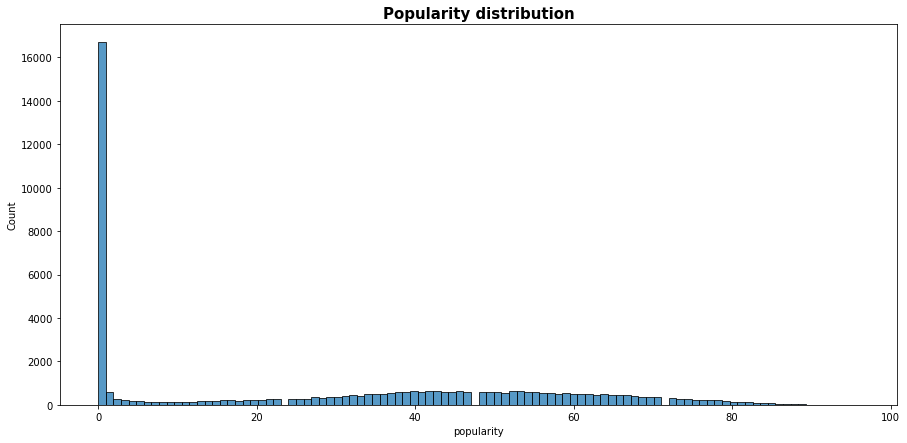

In [13]:
plt.figure(figsize=(15, 7))
plt.title('Popularity distribution', fontsize=15, fontweight="bold")
sns.histplot(data=df_music, x='popularity', bins=100)
plt.show()

In [14]:
len(df_music)

47814

In [15]:
len(df_music.query('popularity>0'))

31126

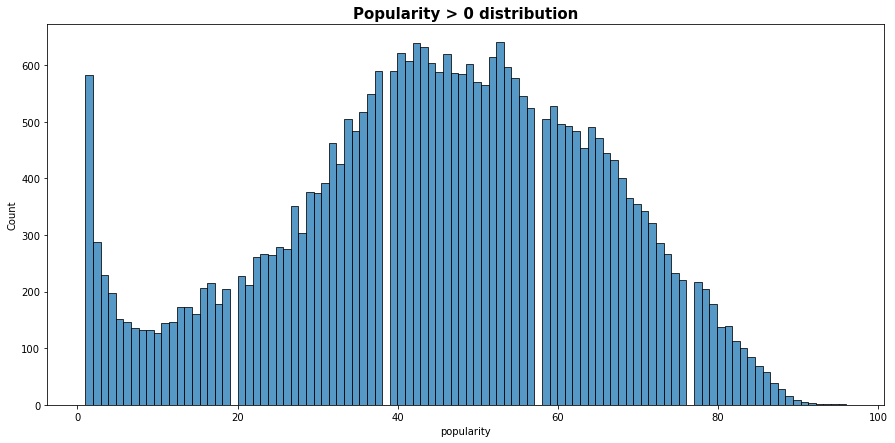

In [16]:
plt.figure(figsize=(15, 7))
plt.title('Popularity > 0 distribution', fontsize=15, fontweight="bold")
sns.histplot(data=df_music.query('popularity>0'), x='popularity', bins=100)
plt.show()

In [17]:
len(np.unique(df_music.artist_name_1))

16547

In [52]:
numerical_col = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'popularity']

col_train = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

In [53]:
data = df[numerical_col]
data = data.query('popularity>0')

In [54]:
a = (data['popularity'] <= 50)

data['is_top50'] = a

In [60]:
X_df = data[col_train]

y = np.array(data['is_top50'])


In [61]:
X_df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
1,0.687,0.845,-4.370,0.0576,0.1000,0.000000,0.0452,0.809,87.972,190226
2,0.818,0.803,-4.282,0.0797,0.0340,0.000000,0.1530,0.632,106.970,225983
3,0.624,0.876,-3.374,0.1000,0.0735,0.000000,0.3270,0.781,99.943,170826
4,0.614,0.379,-10.480,0.0476,0.6070,0.000464,0.0986,0.201,107.989,258986
5,0.768,0.517,-4.323,0.0312,0.1860,0.000038,0.1040,0.418,104.992,216896


In [59]:
len(numerical_col)

11

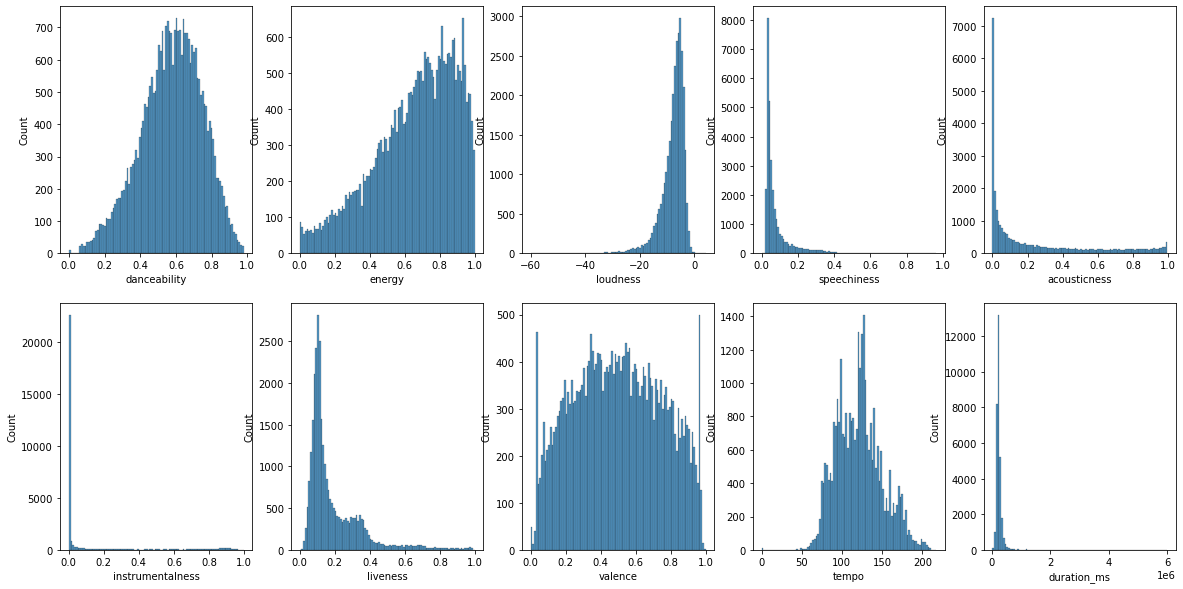

In [24]:
numerical_col_bis = ['danceability', 'energy', 'loudness', 'speechiness', 
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for i, num_col in enumerate(numerical_col_bis) :
    row = int(i // 5)
    col = int(i % 5)
    sns.histplot(data=df_music.query('popularity>0'), x=num_col, bins=100, ax=ax[row][col])
plt.show()

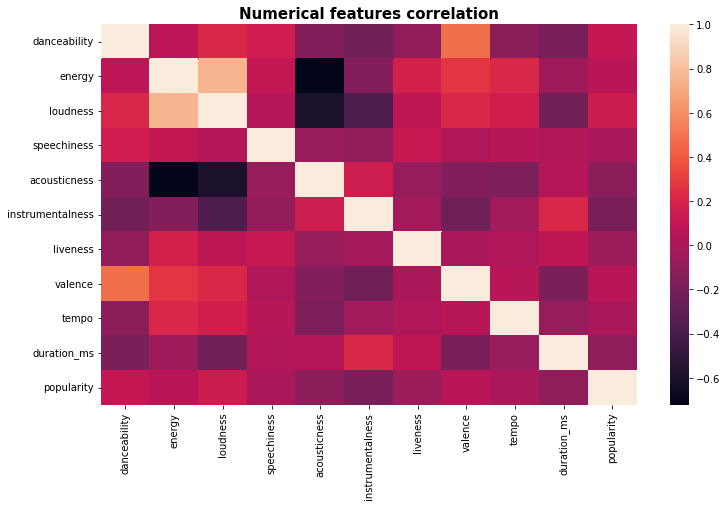

In [25]:
plt.figure(figsize=(12, 7))
plt.title('Numerical features correlation', fontsize=15, fontweight="bold")
sns.heatmap(df_music.query('popularity>0')[numerical_col].corr())
plt.show()

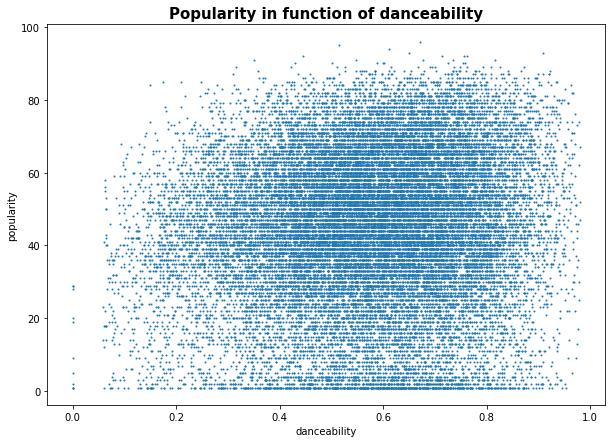

Pearson correlation : 0.11


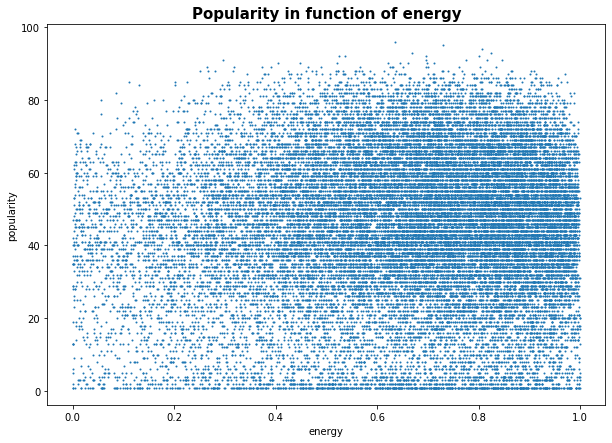

Pearson correlation : 0.07


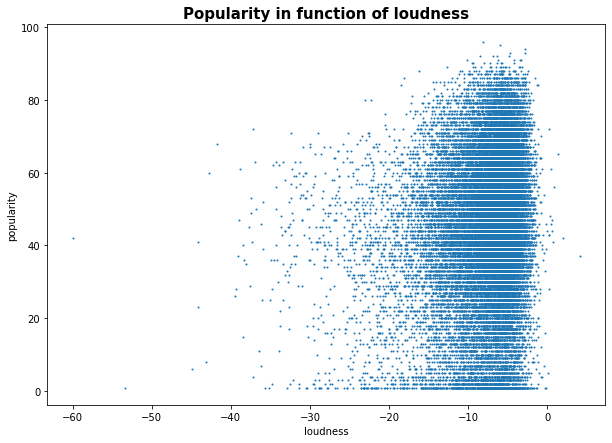

Pearson correlation : 0.14


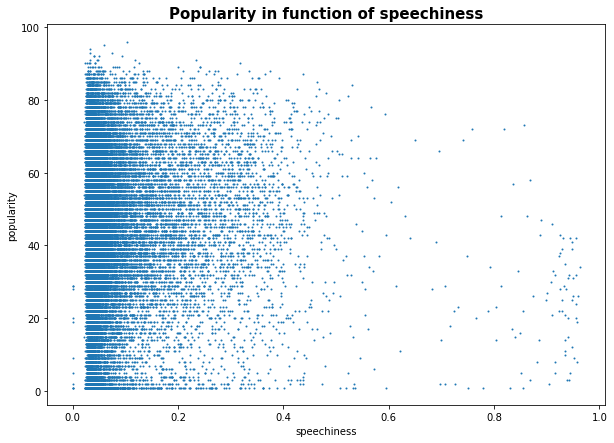

Pearson correlation : -0.0


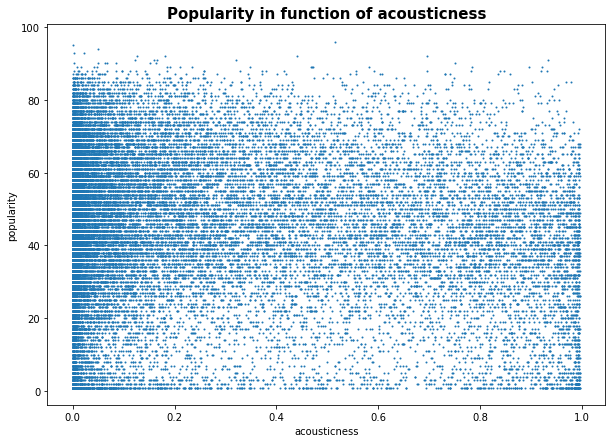

Pearson correlation : -0.11


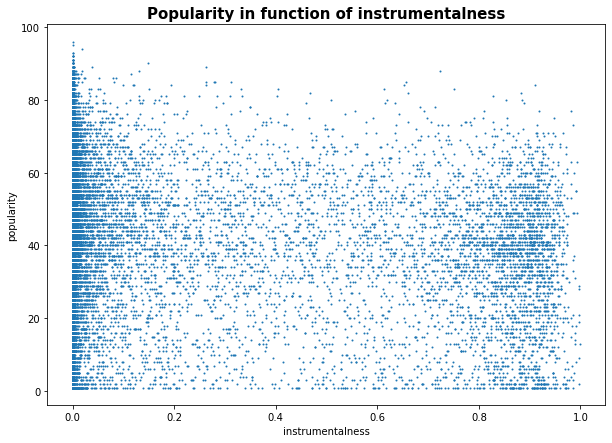

Pearson correlation : -0.19


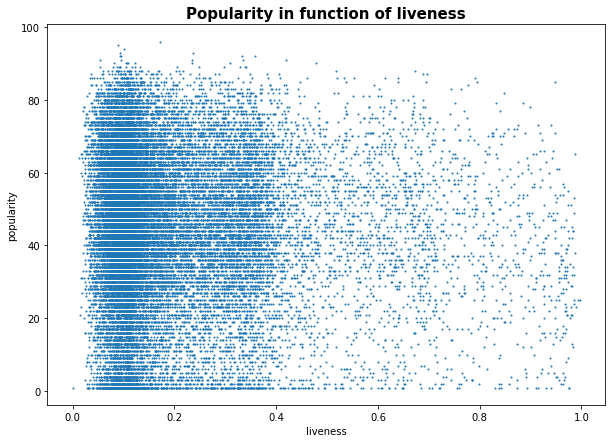

Pearson correlation : -0.05


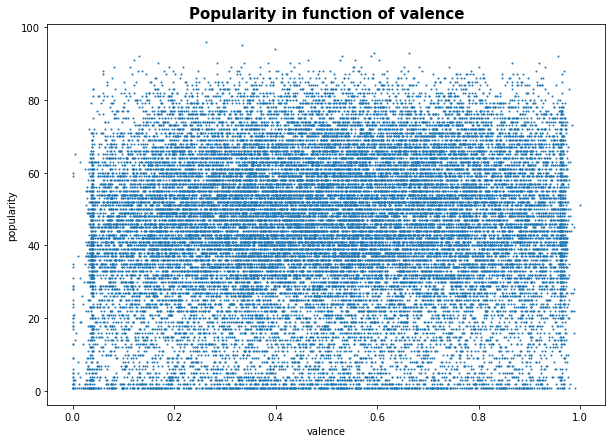

Pearson correlation : 0.06


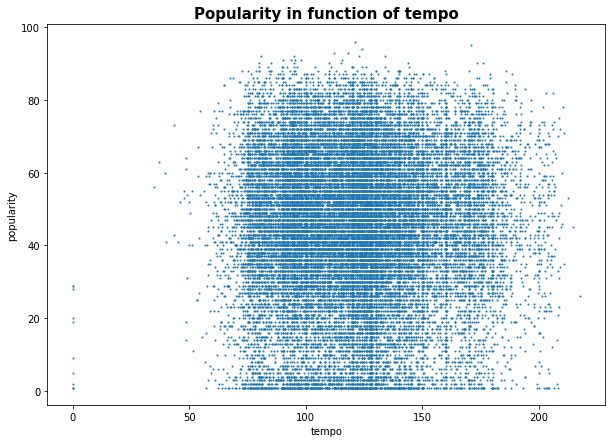

Pearson correlation : 0.01


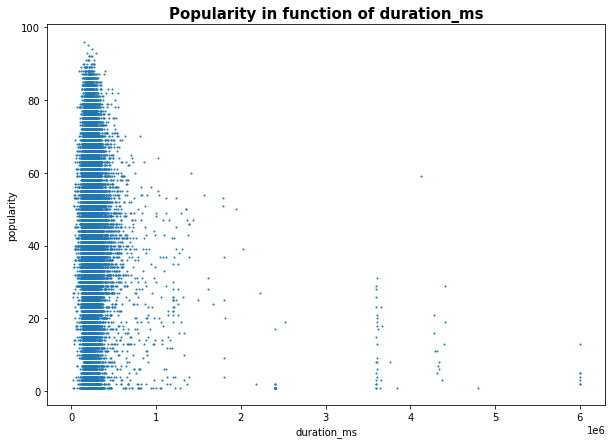

Pearson correlation : -0.1


In [26]:
df_pop_pos = df_music.query('popularity>0')
for numerical_col in numerical_col_bis:
    plt.figure(figsize=(10, 7))
    plt.title(f'Popularity in function of {numerical_col}', fontsize=15, fontweight='bold')
    plt.xlabel(numerical_col)
    plt.ylabel('popularity')
    x = df_pop_pos[numerical_col]
    y = df_pop_pos.popularity
    plt.scatter(x=x, y=y, s=1)
    plt.show()
    corr = np.round(np.corrcoef(x, y)[0, 1], 2)
    print(f'Pearson correlation : {corr}')

#### Seasonality

In [27]:
df_music['month']  = df_music['album_date'].apply(lambda date : pd.to_datetime(date).month)
df_music['year']  = df_music['album_date'].apply(lambda date : pd.to_datetime(date).year)
df_music['day_of_week']  = df_music['album_date'].apply(lambda date : pd.to_datetime(date).day_of_week)

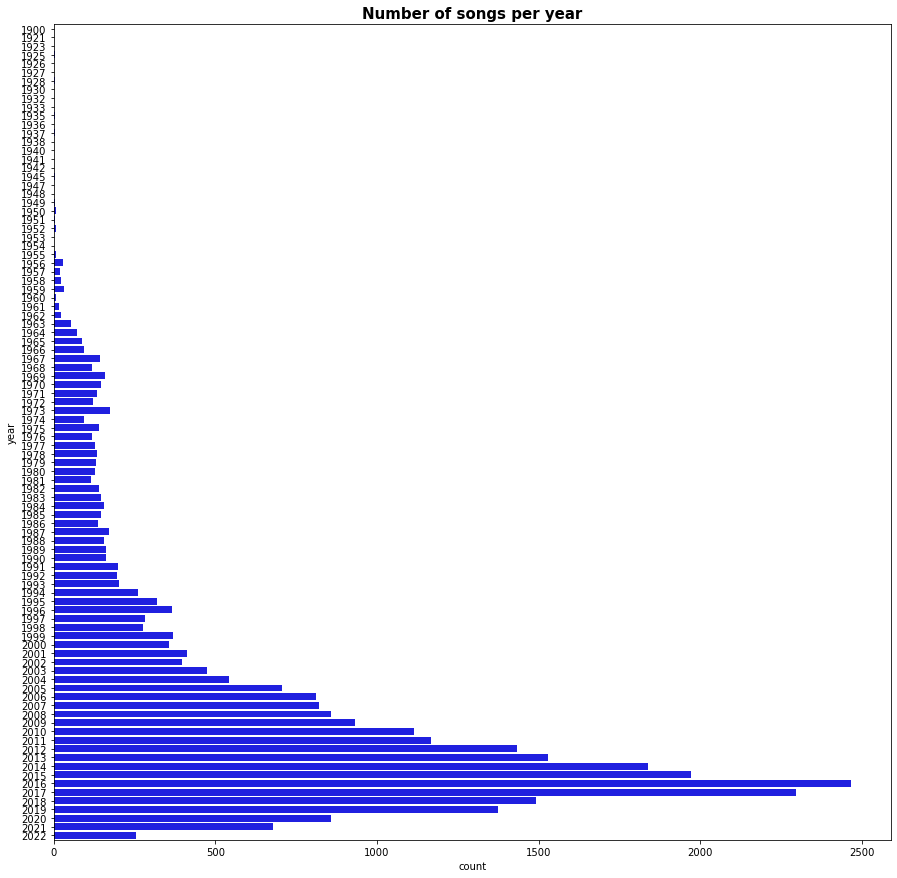

In [28]:
plt.figure(figsize=(15, 15))
plt.title('Number of songs per year', fontsize=15, fontweight="bold")
sns.countplot(data = df_music.query('popularity>0'), y='year', color='Blue')
plt.show()

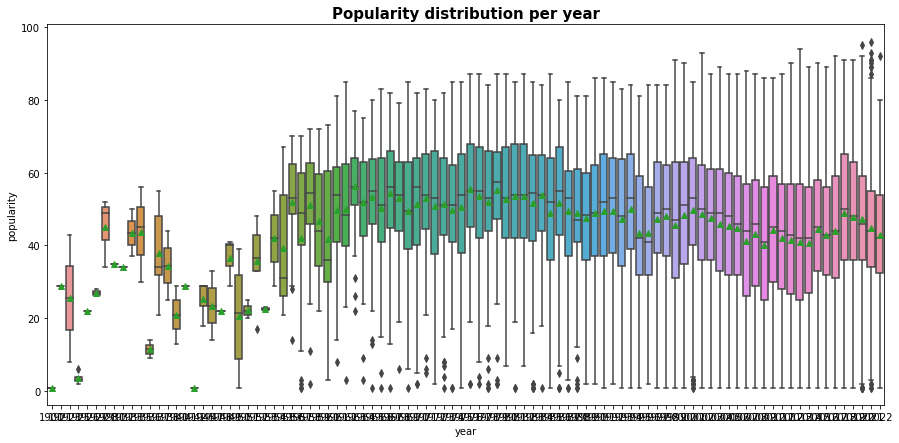

In [29]:
plt.figure(figsize=(15, 7))
plt.title('Popularity distribution per year', fontsize=15, fontweight="bold")
sns.boxplot(data=df_music.query('popularity>0'), x='year', y='popularity', showmeans=True)
plt.show()

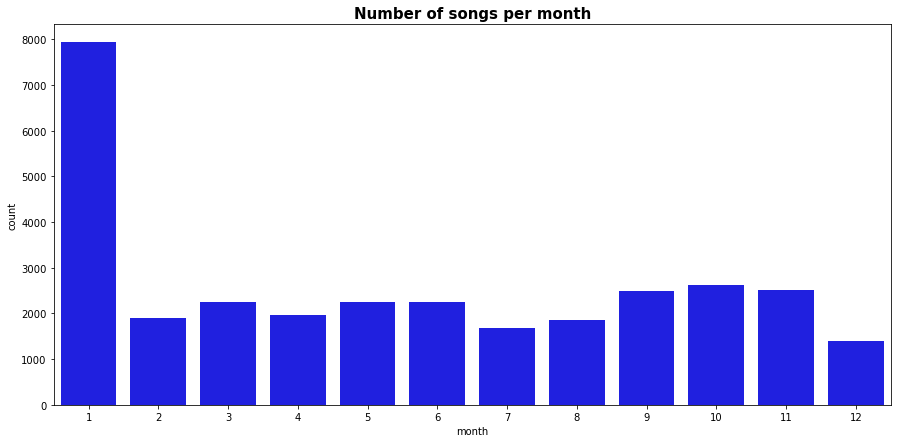

In [30]:
plt.figure(figsize=(15, 7))
plt.title('Number of songs per month', fontsize=15, fontweight="bold")
sns.countplot(data = df_music.query('popularity>0'), x='month', color='Blue')
plt.show()

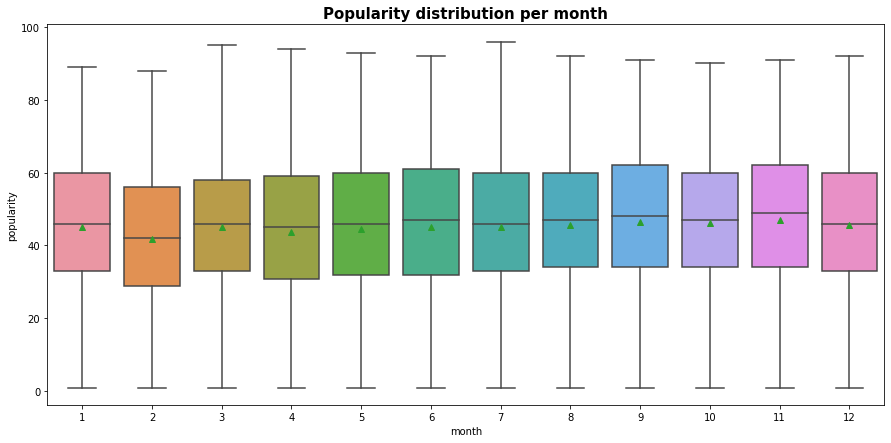

In [31]:
plt.figure(figsize=(15, 7))
plt.title('Popularity distribution per month', fontsize=15, fontweight="bold")
sns.boxplot(data=df_music.query('popularity>0'), x='month', y='popularity', showmeans=True)
plt.show()

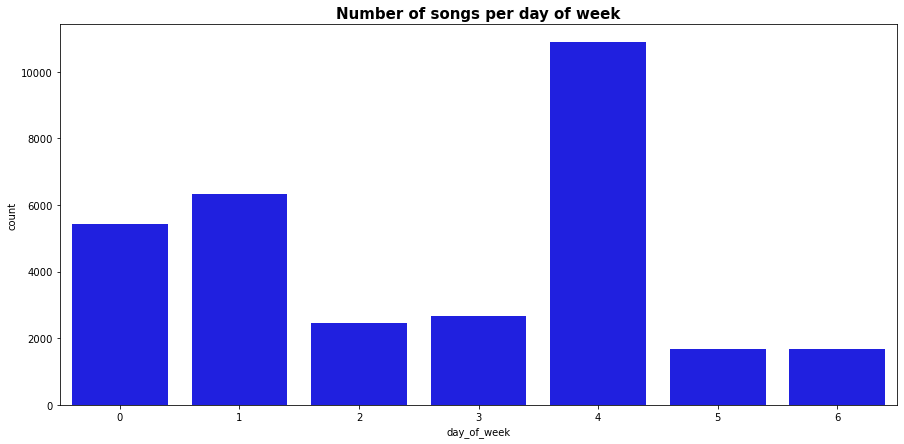

In [32]:
plt.figure(figsize=(15, 7))
plt.title('Number of songs per day of week', fontsize=15, fontweight="bold")
sns.countplot(data = df_music.query('popularity>0'), x='day_of_week', color='Blue')
plt.show()

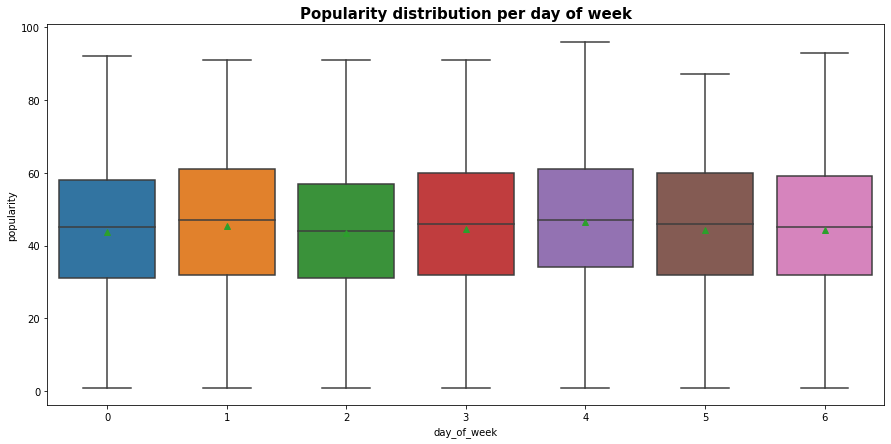

In [33]:
plt.figure(figsize=(15, 7))
plt.title('Popularity distribution per day of week', fontsize=15, fontweight="bold")
sns.boxplot(data=df_music.query('popularity>0'), x='day_of_week', y='popularity', showmeans=True)
plt.show()

### B) Data Cleaning (Encoding, Outliers..)


### C) Features


## III - Model testing

### Spliting

In [62]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X_df)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, random_state=42)

In [63]:
len(X_train)

18154

In [64]:
print(X_test, y_test)

[[0.40789474 0.90880962 0.75254592 ... 0.9305835  0.85327752 0.05904443]
 [0.44635628 0.5701025  0.72187302 ... 0.71428571 0.55488512 0.06329145]
 [0.60425101 0.48592677 0.64435024 ... 0.61770624 0.73520958 0.11214343]
 ...
 [0.4402834  0.82563598 0.75756468 ... 0.93762575 0.7136754  0.11734898]
 [0.68522267 0.40175104 0.71039809 ... 0.19617706 0.48403224 0.1061321 ]
 [0.51821862 0.55306694 0.68525557 ... 0.21126761 0.62320152 0.0927595 ]] [ True  True  True ...  True False  True]


### Classification

In [65]:
from sklearn.pipeline import make_pipeline
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import neighbors
n_neighbors = 15

models = [MLPClassifier(solver='lbfgs', alpha=1e-7,
                        hidden_layer_sizes=(40, 2), random_state=1),
          tree.DecisionTreeClassifier(),
          neighbors.KNeighborsClassifier(n_neighbors, weights='uniform'), 
          
          RandomForestClassifier(n_estimators=500),
          
         ]

for model in models:
    
    clf = model
    clf.fit(X_train, y_train)
    
    print(model, ' score:', clf.score(X_test, y_test))
    if model == tree.DecisionTreeClassifier():
        tree.plot_tree(clf)




MLPClassifier(alpha=1e-07, hidden_layer_sizes=(40, 2), random_state=1,
              solver='lbfgs')  score: 0.5366820885657634
DecisionTreeClassifier()  score: 0.6639127561136814
KNeighborsClassifier(n_neighbors=15)  score: 0.6369795109054858
RandomForestClassifier(n_estimators=500)  score: 0.7273628552544613


### Neural net

In [ ]:
 conda install -c conda-forge tensorflow 


In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
model = keras.Sequential(
    [
        keras.layers.Dense(40, input_dim=10, activation='relu'),
        keras.layers.Dense(40, activation="relu"),
        keras.layers.Dense(1, activation='sigmoid'),
    ])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=10)